# Lab for data manipulation
Required packages:

- `pandas`
- `seaborn`

The lab is organized using standard data processing pipeline:
1. Retrieve/load dataset(s);
2. Perform preprocessing and filtering;
3. Compute statistical estimators;
4. Plot the data.


For this lab, two datasets are available:
- `data/romeo_juliet_character.csv`: contains for each line who is the player and their gender.
- `data/romeo_juliet_line.csv`: contains for each line the content.

Their common information to match them together is the column `line_index`.

In [2]:
import pandas as pd

## Loading datasets

Pandas is able to load data from a wide range of format:
- From RAM using dictionaries
- From CSV files using `read_csv`
- From XML files using `read_xml`
- From HTML files using `read_html`
...

In [3]:

# Load data from CSV
df = pd.read_csv("data/shakespeare.csv")

# Load data from RAM
df = pd.DataFrame({"column_1": [1, 2, 3], "column_2": [2, 3, 1], "column_3": ["value_1", "value_2", "value_2"]}, index=["index_1", "index_2", "index_3"])


**Exercice**: Load the two datasets in `data/romeo_juliet_character.csv` and in `data/romeo_juliet_line.csv` and store them in the variable `character` and `line`.

In [10]:
# load the two datasets
character = ...
line = ...

## Basic dataset information

After the initial loading process, several information can be computed on the dataset:
- Its size, using the attribute `.shape`
- Its columns, using the attributes `.columns`
- Its first rows, using the method `.head()`

In [7]:
# Example on demo dataframe
df.shape
df.columns
df.head()

,column_1,column_2,column_3
index_1,1,2,value_1
index_2,2,3,value_2
index_3,3,1,value_2


**Exercice**:
1. For each of the two Romeo and Juliet Dataframe, give their number of lines and columns.
2. For each of the two Romeo and Juliet Dataframe, give their column names.
3. For each of the two Romeo and Juliet Dataframe, obtain the `head()` of the dataframe and describe each column.

## Merging the two datasets

Often, information is scattered across several dataframes, and one must merge together several datasets to create a single one with the whole information (*see lecture slides on this topic*).

Pandas using the function `pd.merge()` to merge together two dataframes, where you must specify:
- The two dataframes to merge;
- The merge columns as the name of the columns in the  `left_on` (first daframe) and the `right_on` parameters (second dataframe);
- The merge approach using the `how` parameters (left, right, inner, outer) (*see lecture slides*).

In [16]:
# Example merge
df_1 = pd.DataFrame({"column_1": [1, 2, 3], "column_2": [2, 3, 1], "column_3": ["value_1", "value_2", "value_2"]})
df_2 = pd.DataFrame({"column_4": [1, 2, 3], "column_5": [2, 5, 1]})

df = pd.merge(df_1, df_2, how="inner", left_on="column_1", right_on="column_4")

df.head()

,column_1,column_2,column_3,column_4,column_5
0,1,2,value_1,1,2
1,2,3,value_2,2,5
2,3,1,value_2,3,1


**Exercice**: Create a DataFrame `romeo_juliet` that merges the two dataframes in an inner fashion, both on their column `line_index`. List the columns of this new dataset.

## Filtering the dataset
Another important feature of pandas is the possibility of filtering the dataset in order to only work with the wanted individuals and variables.

In [33]:
df = pd.DataFrame({"column_1": [1, 2, 3], "column_2": [2, 3, 1], "column_3": ["value_1", "value_2", "value_2"]}, index=["index_1","index_2","index_3"])

#### Accessing rows

In [26]:
# First row by index range
df.iloc[0:2]
# Also first row by index name
df.loc["index_1"]

column_1          1
column_2          2
column_3    value_1
Name: index_1, dtype: object

**Exercice**: Return the rows between line 20 and 40 of the `romeo_juliet` DataFrame you created in the previous question.

#### Accessing columns

In [34]:
# Access as a series 
df["column_1"]
# or
df.column_1

# Access several columns at the same time
df[["column_1", "column_2"]]

# Access using both rows and column index
print(df.loc["index_1", 'column_1'])

1


In [31]:
df = pd.read_csv("data/shakespeare.csv")

**Exercice**: Return the columns Player and PlayerLine from the `romeo_juliet` dataset.

#### Filtering data on conditions

Boolean conditions can be applied to filter out different rows.
The return results is a DataFrame for which you can manipulate the same attributes and methods than other DataFrames.

In [35]:
# Filter on a specific column
df.column_1[df.column_1 > 1]

# Filter on the dataframe
df[df.column_3 == "value_1"]

# Group conditions
df.column_1[(df.column_1 > 1) & (2 > df.column_2)]

index_3    3
Name: column_1, dtype: int64

### Sorting data

Data can be sorted using the `sort_values()` method, which takes as argument in `by` the name of the column for sorting and the boolean value for `ascending`.

In [39]:

df.sort_values(by="column_1", ascending=True)

,column_1,column_2,column_3
index_1,1,2,value_1
index_2,2,3,value_2
index_3,3,1,value_2


**Exercice**:
1. Give the number of lines performed by a male and by a female actor.
2. Return all lines with an index above 50.
3. Sort dataset alphabetically by character's name.
4. Return all lines said by Juliet.
4. **Bonus**: return all the name of actor names that start with an R.

## Computing statistical estimators

After data preprocessing, computing statistical estimators is one of the final goal of data science.
As we saw in the lecture this morning, analysis can be either univariate or multivariate.

##### Univariate analysis

In [36]:
df = pd.DataFrame({"column_1": [1, 2, 3], "column_2": [2, 3, 1], "column_3": ["value_1", "value_2", "value_2"]}, index=["index_1","index_2","index_3"])

The method `describe` provides all standard estimators (on **quantitative** data), which can also be computed separately using the corresponding method.

In [37]:
df.describe()

,column_1,column_2
count,3.0,3.0
mean,2.0,2.0
std,1.0,1.0
min,1.0,1.0
25%,1.5,1.5
50%,2.0,2.0
75%,2.5,2.5
max,3.0,3.0


For **categorical** data, you should use `value_counts` to compute the different numbers of time a value is present in the dataset. You calso use the `unique()` method to return an array of unique values within the dataframe.

In [42]:
df.column_3.value_counts()
df.column_3.unique()

array(['value_1', 'value_2'], dtype=object)

#### Multivariate analysis

Multivariate analysis consists in studying the relationship between several variables of the dataset. 

In the case of 1 categorical and 1 numerical variable, this analysis can be performed using the groupby method `groupby()`, that takes as input the name of the grouping variable, followed by the call of the method corresponding to the wanted estimator for the grouping.

In [44]:
df.groupby("column_3").mean()

,column_1,column_2
column_3,,
value_1,1.0,2.0
value_2,2.5,2.0


**Exercice**:
1. Give the name of distinct characters.
2. Count the number of lines by each character and return the character with the most line (method to computer the counts is `count()`).
3. Count the number of lines given by each gender.

## Plotting results

There are several libraries to perform plotting in Python, but we focus for this lab on the `seaborn` library. The standard Python library for plotting is `seaborn`, and seaborn is a wrapper around it that enables easy integration with pandas dataframe.

Most plots are integrated within the library, using the following syntax:
- x: Value of x axis;
- y: Value of y axis;
- hue: Color and grouping factor;
- data: pandas DataFrame.

In [46]:
import seaborn as sns

Count plots consist in counting the values for a given variable.

/tmp/ipykernel_2094/605654996.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30)


[Text(0, 0, 'value_1'), Text(1, 0, 'value_2')]

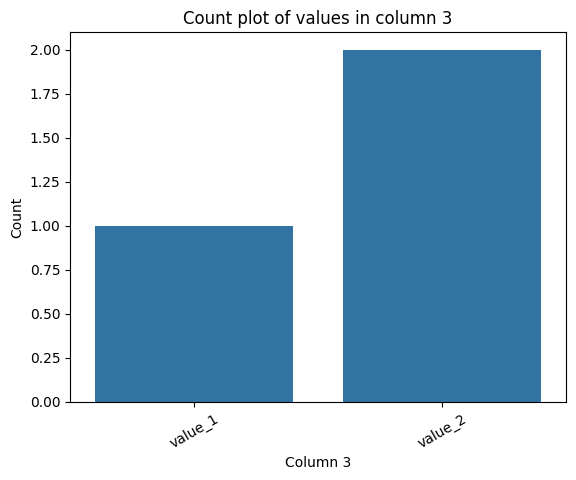

In [48]:
# Create a count plot with the proper x and y title
g = sns.countplot(x="column_3", data=df)
g.set_xlabel("Column 3")
g.set_ylabel("Count")
g.set_title("Count plot of values in column 3")

# Rotate x labels (is handy when you have a lot of x data)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

Text(0.5, 1.0, 'Scatter plot of column 1 and column 2')

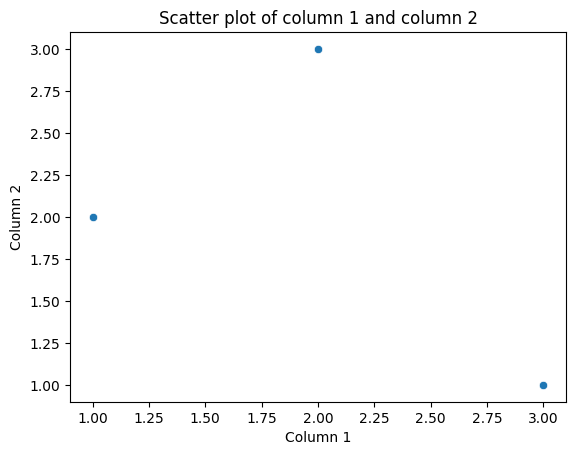

In [50]:


# Create a scatter plot
g = sns.scatterplot(x="column_1", y="column_2", data=df)
g.set_xlabel("Column 1")
g.set_ylabel("Column 2")
g.set_title("Scatter plot of column 1 and column 2")

**Exercice**:
1. Represent graphically the number of lines per gender. The x and y labels, as well the graph title, should be properly specified.
2. Represent graphically the number of lines per actor. The x and y labels, as well the graph title, should be properly specified.

**Bonus exercice**:
If you have finished all the previous exercises :-)

1. Extract all verses that contain the word "love".
2. Extract all verses said by Juliet that contains the word love.
3. Perform the following chronological plot: plot every said line as a dot in blue, except if it contains the word love.